In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [4]:
train=pd.read_csv('~/Downloads/train.csv')
test=pd.read_csv('~/Downloads/test.csv')

In [5]:
# concatenate the data...
combined=pd.concat([train, test], ignore_index=False, sort=False)

In [7]:
train.shape, test.shape, combined.shape

((891, 12), (418, 11), (1309, 12))

In [8]:
# Check the missing values
combined.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

# Univariate analysis

In [9]:
combined.select_dtypes(include=np.number).columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

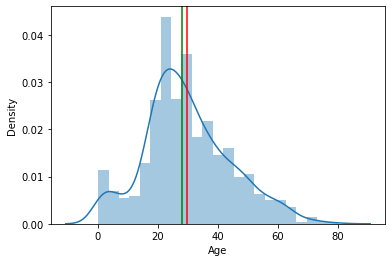

In [13]:
# NUMERICAL VARIABLE
sns.distplot(combined.Age)
plt.axvline(combined.Age.mean(),color='red')
plt.axvline(combined.Age.median(),color='green')
plt.show()

In [12]:
combined.Age.describe()

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

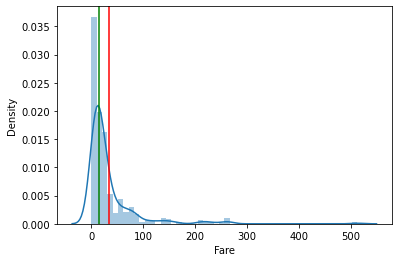

In [14]:
sns.distplot(combined.Fare)
plt.axvline(combined.Fare.mean(),color='red')
plt.axvline(combined.Fare.median(),color='green')
plt.show()

<AxesSubplot:xlabel='Survived', ylabel='count'>

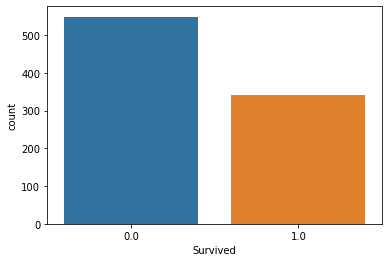

In [17]:
# CATEGORICAL VARIABLE
sns.countplot(combined.Survived)
# Count of people who died is more than count of people who survived

<AxesSubplot:xlabel='Pclass', ylabel='count'>

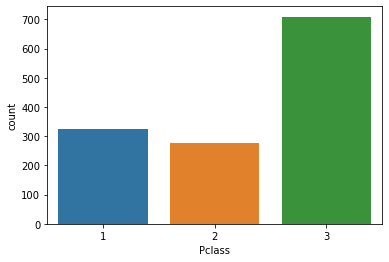

In [18]:
sns.countplot(combined.Pclass)
# Since we know that there are lot of passengers in class 3 therefore there is high possibility that the maximum num of people 
# who died came from class 3.

<AxesSubplot:xlabel='Sex', ylabel='count'>

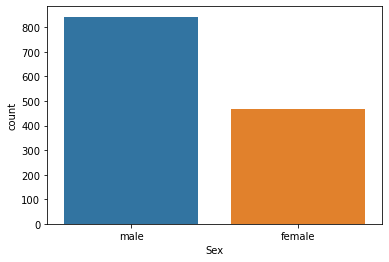

In [19]:
sns.countplot(combined.Sex)
# More males on the board of titanic.

<AxesSubplot:xlabel='SibSp', ylabel='count'>

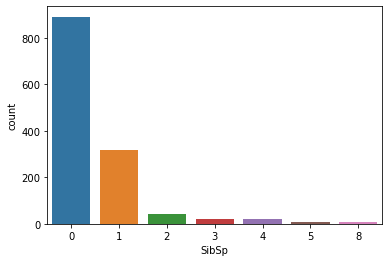

In [20]:
sns.countplot(combined.SibSp)
# 0 represents there is min 1 passenger

<AxesSubplot:xlabel='Parch', ylabel='count'>

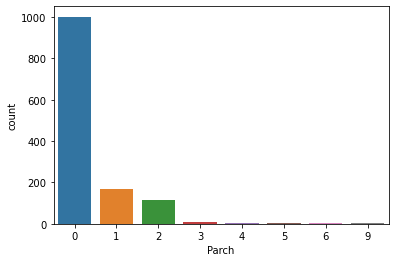

In [21]:
sns.countplot(combined.Parch)

In [22]:
combined.Ticket.unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [24]:
combined

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


<AxesSubplot:xlabel='Embarked', ylabel='count'>

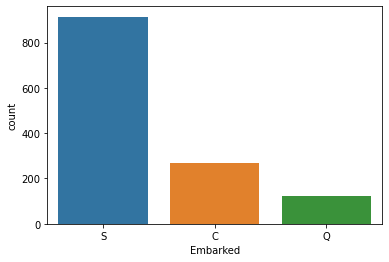

In [25]:
sns.countplot(combined.Embarked)
# C=Cherbourg Q=Queenstown S=Southampton
# Lot of people boarded the ship from southampton

# Bivariate analysis

<AxesSubplot:xlabel='Survived', ylabel='Age'>

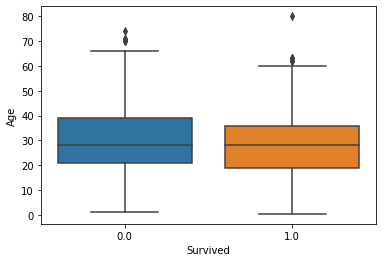

In [27]:
sns.boxplot(x='Survived', y='Age', data=combined)
# People who did not survive have a higher range of age values.
# We also notice that a passenger with the age of 80 survived.

In [28]:
# Find the statistical summary
combined.groupby('Survived')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0.0,424.0,30.626179,14.172110,1.00,21.0,28.0,39.0,74.0
1.0,290.0,28.343690,14.950952,0.42,19.0,28.0,36.0,80.0


<AxesSubplot:xlabel='Survived', ylabel='Fare'>

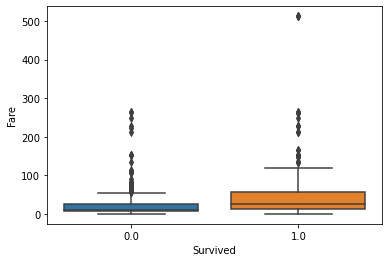

In [29]:
sns.boxplot(x='Survived', y='Fare', data=combined)

In [31]:
combined.groupby('Survived')['Fare'].describe()
# the people who survived paid more fare.

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0.0,549.0,22.117887,31.388207,0.0,7.8542,10.5,26.0,263.0000
1.0,342.0,48.395408,66.596998,0.0,12.4750,26.0,57.0,512.3292


In [33]:
# cat vs cat
tbl=pd.crosstab(combined.Pclass, combined.Survived)
tbl

Survived,0.0,1.0
Pclass,,
1,80,136
2,97,87
3,372,119


<AxesSubplot:xlabel='Pclass'>

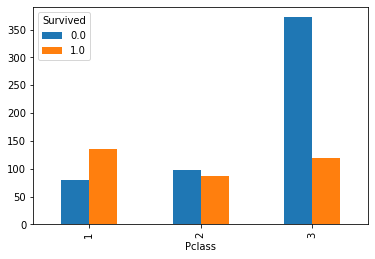

In [34]:
tbl.plot(kind='bar')
# Most of the people who died came from class 3

<AxesSubplot:xlabel='Sex'>

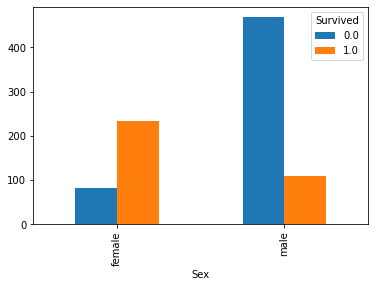

In [36]:
tbl=pd.crosstab(combined.Sex, combined.Survived)
tbl.plot(kind='bar')

<AxesSubplot:xlabel='SibSp'>

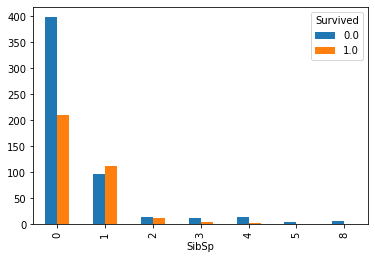

In [38]:
tbl=pd.crosstab(combined.SibSp, combined.Survived)
tbl.plot(kind='bar')

In [39]:
# Create a new feature called family
combined['Family']=combined.SibSp+combined.Parch+1

<AxesSubplot:xlabel='Family'>

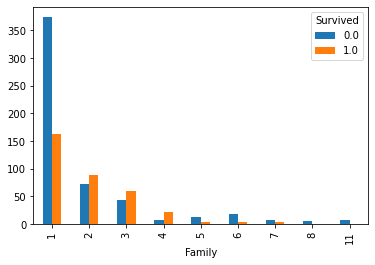

In [40]:
tbl=pd.crosstab(combined.Family, combined.Survived)
tbl.plot(kind='bar')
# larger families have a very low chance of survival

<AxesSubplot:xlabel='Embarked'>

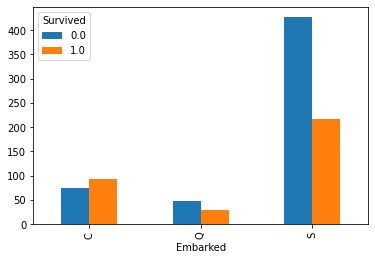

In [41]:
tbl=pd.crosstab(combined.Embarked, combined.Survived)
tbl.plot(kind='bar')

# INFERENCES
* People from southampton and cherbourg have better chance of survival.
* Passengers from class 1 have better survival possibility.
* The people who survived paid more fare than the rest.
* Most of casualities belonged to male passengers.
* Larger families have a lower survival ratio.
* Older people have a lesser chance of survival.

# Feature engineering

In [45]:
combined.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [46]:
Cabins=['C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64', 'E24', 'C90', 'C45', 'E8', 'B101', 'D45', 'C46', 'D30',
       'E121', 'D11', 'E77', 'F38', 'B3', 'D6', 'B82 B84', 'D17', 'A36',
       'B102', 'B69', 'E49', 'C47', 'D28', 'E17', 'A24', 'C50', 'B42',
       'C148', 'B45', 'B36', 'A21', 'D34', 'A9', 'C31', 'B61', 'C53',
       'D43', 'C130', 'C132', 'C55 C57', 'C116', 'F', 'A29', 'C6', 'C28',
       'C51', 'C97', 'D22', 'B10', 'E45', 'E52', 'A11', 'B11', 'C80',
       'C89', 'F E46', 'B26', 'F E57', 'A18', 'E60', 'E39 E41',
       'B52 B54 B56', 'C39', 'B24', 'D40', 'D38', 'C105']

In [55]:
def cabincount(x):
    if x in Cabins:
        return ('Cabin_Allotted')
    else:
        return('Cabin_Missing')

In [56]:
combined.Cabin.apply(cabincount)

0       Cabin_Missing
1      Cabin_Allotted
2       Cabin_Missing
3      Cabin_Allotted
4       Cabin_Missing
            ...      
413     Cabin_Missing
414    Cabin_Allotted
415     Cabin_Missing
416     Cabin_Missing
417     Cabin_Missing
Name: Cabin, Length: 1309, dtype: object

In [57]:
combined['Cabin_cat']=combined.Cabin.apply(cabincount)

In [59]:
pd.crosstab(combined.Cabin_cat, combined.Survived)

Survived,0.0,1.0
Cabin_cat,,
Cabin_Allotted,68,136
Cabin_Missing,481,206


In [70]:
# Extracting titles
name = combined.Name.apply(lambda x:x.split(', ')[1])
combined['titles']=pd.Series(name.apply(lambda x:x.split('. ')[0]))

In [71]:
combined.titles.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [82]:
title_ignore=['Don', 'Rev', 'Dr', 'Mme','Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona']

In [85]:
def titles(x):
    if x in title_ignore:
        return ('Others')
    else:
        return(x)

In [86]:
combined['titles']=combined.titles.apply(titles)

In [87]:
combined

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Cabin_cat,titles
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Cabin_Missing,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,Cabin_Allotted,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Cabin_Missing,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,Cabin_Allotted,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,Cabin_Missing,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,1,Cabin_Missing,Mr
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1,Cabin_Allotted,Others
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1,Cabin_Missing,Mr
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,1,Cabin_Missing,Mr


# Missing values

In [88]:
combined.groupby('titles')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
titles,,,,,,,,
Master,53.0,5.482642,4.161554,0.33,2.0,4.0,9.0,14.5
Miss,210.0,21.774238,12.249077,0.17,15.0,22.0,30.0,63.0
Mr,581.0,32.252151,12.422089,11.00,23.0,29.0,39.0,80.0
Mrs,170.0,36.994118,12.901767,14.00,27.0,35.5,46.5,76.0
Ms,1.0,28.000000,NaN,28.00,28.0,28.0,28.0,28.0
Others,31.0,43.129032,12.309189,23.00,32.5,45.0,52.5,70.0


In [91]:
combined.Age.median()

28.0

In [93]:
combined.loc[(combined.titles=='Master') & (combined.Age.isnull()),'Age'] = 4.0

In [94]:
combined.loc[(combined.titles=='Miss') & (combined.Age.isnull()),'Age'] = 22.0

In [95]:
combined.loc[(combined.titles=='Mr') & (combined.Age.isnull()),'Age'] = 29.0

In [96]:
combined.loc[(combined.titles=='Mrs') & (combined.Age.isnull()),'Age'] = 35.5

In [97]:
combined.loc[(combined.titles=='Ms') & (combined.Age.isnull()),'Age'] = 28.0

In [98]:
combined.loc[(combined.titles=='Others') & (combined.Age.isnull()),'Age'] = 45.0

In [101]:
combined.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
Family            0
Cabin_cat         0
titles            0
dtype: int64

In [108]:
combined.Embarked.fillna(combined.Embarked.mode()[0], inplace=True)
combined.Fare.fillna(combined.Fare.median(), inplace=True)

In [110]:
# Drop the unnecessary variables
new=combined.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin'],axis=1)

In [111]:
new

,Survived,Pclass,Sex,Age,Fare,Embarked,Family,Cabin_cat,titles
0,0.0,3,male,22.0,7.2500,S,2,Cabin_Missing,Mr
1,1.0,1,female,38.0,71.2833,C,2,Cabin_Allotted,Mrs
2,1.0,3,female,26.0,7.9250,S,1,Cabin_Missing,Miss
3,1.0,1,female,35.0,53.1000,S,2,Cabin_Allotted,Mrs
4,0.0,3,male,35.0,8.0500,S,1,Cabin_Missing,Mr
...,...,...,...,...,...,...,...,...,...
413,NaN,3,male,29.0,8.0500,S,1,Cabin_Missing,Mr
414,NaN,1,female,39.0,108.9000,C,1,Cabin_Allotted,Others
415,NaN,3,male,38.5,7.2500,S,1,Cabin_Missing,Mr
416,NaN,3,male,29.0,8.0500,S,1,Cabin_Missing,Mr


In [112]:
new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    float64
 1   Pclass     1309 non-null   int64  
 2   Sex        1309 non-null   object 
 3   Age        1309 non-null   float64
 4   Fare       1309 non-null   float64
 5   Embarked   1309 non-null   object 
 6   Family     1309 non-null   int64  
 7   Cabin_cat  1309 non-null   object 
 8   titles     1309 non-null   object 
dtypes: float64(3), int64(2), object(4)
memory usage: 134.6+ KB


# Data leakage
* If we scale the data before splitting the chances are the model will be able to get a preview of the test data.
* Therefore in order to avoid this scenario we fit the data on train and use the train parameters(train_mean, train_std)
  to scale the test set.
* Is the above mentioned point a correct set of practice used by ML engineers - Yes because we always want to tune the 
  test set on the basis of training set.

In [113]:
train.shape

(891, 12)

In [114]:
combined.shape

(1309, 15)

In [118]:
# Splitted the data into train and test
newtrain=new.iloc[0 :891, :]

In [119]:
newtest=new.iloc[891:]

In [120]:
newtrain.shape , newtest.shape

((891, 9), (418, 9))

In [121]:
# drop target variable from test
newtest=newtest.drop('Survived',axis=1)

In [122]:
newtrain.shape , newtest.shape

((891, 9), (418, 8))

# Scaling

In [129]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler() #fit will store the mean and std of train data
df=pd.DataFrame(sc.fit_transform(newtrain.loc[:,['Age','Fare']]),columns=['age_scaled','fare_scaled'])

In [130]:
newtrain['Age']=df['age_scaled']
newtrain['Fare']=df['fare_scaled']

In [131]:
# scale the age and fare in test
testdf=pd.DataFrame(sc.transform(newtest.loc[:,['Age','Fare']]),columns=['age_scaled','fare_scaled'])

In [133]:
newtest['Age']=testdf['age_scaled']
newtest['Fare']=testdf['fare_scaled']

In [136]:
newtest

,Pclass,Sex,Age,Fare,Embarked,Family,Cabin_cat,titles
0,3,male,0.392499,-0.490783,Q,1,Cabin_Missing,Mr
1,3,female,1.337305,-0.507479,S,2,Cabin_Missing,Mrs
2,2,male,2.471071,-0.453367,Q,1,Cabin_Missing,Mr
3,3,male,-0.174385,-0.474005,S,1,Cabin_Missing,Mr
4,3,female,-0.552307,-0.401017,S,3,Cabin_Missing,Mrs
...,...,...,...,...,...,...,...,...
413,3,male,-0.023216,-0.486337,S,1,Cabin_Missing,Mr
414,1,female,0.732629,1.544246,C,1,Cabin_Allotted,Others
415,3,male,0.694837,-0.502445,S,1,Cabin_Missing,Mr
416,3,male,-0.023216,-0.486337,S,1,Cabin_Missing,Mr


In [138]:
# One hot encoder
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()
transformed=ohe.fit_transform(newtrain)
pd.DataFrame(transformed.toarray())

,0,1,2,3,4,5,6,7,8,9,...,354,355,356,357,358,359,360,361,362,363
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
887,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
888,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
889,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [139]:
# Dummy train and dummy test
dummytrain=pd.get_dummies(newtrain, drop_first=True)
dummytest=pd.get_dummies(newtest, drop_first=True)


In [140]:
dummytrain.shape, dummytest.shape

((891, 14), (418, 13))